# Importing libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
data = pd.read_csv("C:\\Users\\shrey\\Downloads\\Assignment\\Simple Linear Regression\\delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Correlation

In [4]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\shrey\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

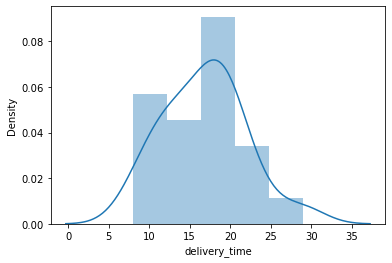

In [5]:
sns.distplot(data['delivery_time'])

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

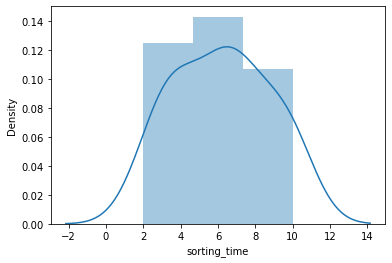

In [6]:
sns.distplot(data['sorting_time'])

In [7]:
model = smf.ols("delivery_time~sorting_time",data = data).fit()

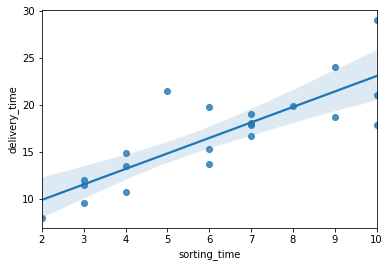

In [8]:
sns.regplot(x="sorting_time", y="delivery_time", data=data);

In [9]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point 

In [13]:
#Predict for sorting time 5,8
newdata=pd.Series([5,8])

In [14]:
newdata

0    5
1    8
dtype: int64

In [15]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [16]:
data_pred

,sorting_time
0,5
1,8


In [17]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64